<a href="https://colab.research.google.com/github/Jegge2003/gradient_boosting_clustering/blob/main/xgboost_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###XGBOOST FOR CLASSIFICATION

#####IMPORTING THE NECESSARY LIBRARIES

In [1]:
#Importing the neccesary libraries
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import  datasets
from sklearn import metrics 
import seaborn as sns

#####SETTING UP THE DATA FOR CLASSIFIER

In [2]:
#Loading wine dataset from sklearn datasets
dataset = datasets.load_wine()

#Specifying the X and y values
X = dataset.data
y = dataset.target

#Splitting dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#####MODEL AND ITS SCORE

In [3]:
#Setting and fitting the model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(objective='multi:softprob')


In [4]:
#Prediction using the trained model
expected_y = y_test
predicted_y = model.predict(X_test)

#Printing classification report and confusion matrix
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        17

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 16]]


###XGBOOST FOR REGRESSION

#####SETTING UP THE DATA FOR REGRESSOR

In [5]:
#Loading the boston dataset
dataset = datasets.load_boston()

#Splitting it into X and y values
X = dataset.data
y = dataset.target

#Splitting data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

#####MODEL AND ITS SCORE

In [6]:
#Setting up and fitting model
model = xgb.XGBRegressor()

model.fit(X_train, y_train)

print(model)

[09:59:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()


In [7]:
#Prediction using the trained model
expected_y = y_test
predicted_y = model.predict(X_test)

#Printing classification report and confusion matrix
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.8380409246864342
0.02087970627497261


###KMEANS CLUSTERING FOR UNSUPERVISED LEARNING

In [8]:
#Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Loading income csv file
df = pd.read_csv('/content/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [12]:
#Preprocessing data
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [13]:
#Showing first 5 rows
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [14]:
#Fitting and predicting with model
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [15]:
#Adding a cluster column of the groups for which they are in
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [16]:
#Displaying the centorids of the clusters
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

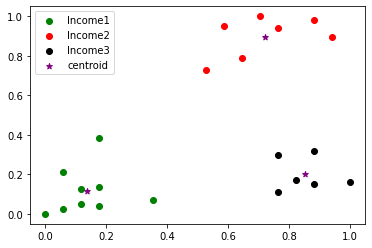

In [18]:
#Plotting each cluster with its centroid
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green', label='Income1')
plt.scatter(df2.Age,df2['Income($)'],color='red', label='Income2')
plt.scatter(df3.Age,df3['Income($)'],color='black', label='Income3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()